## Predicting and Modelling using Deep Learning

Deep learning is what moves people in AI at the moment. It is responsible for many breakthroughs. There is an excellent TED talk on deep learning: https://www.youtube.com/watch?v=xx310zM3tLs Google, Facebook, Bing and all the others currently invest millions into new services based on deep learning. Facebook, for instance, has released DeepText (http://www.wired.co.uk/article/inside-deeptext-facebook-deep-learning-algorithm) to understand the textual content of millions of posts. 

Deep learning is neural networks on steriods with many more neurons, hidden layers, connections, etc. These complex network structure could only recently be built. Even more recent are framework such as Keras in Python (https://keras.io/) that makes building deep learning models easier. 

First run the cell below to load again some our favourite libraries as well as the data from the first session.

In [1]:
#Keep cell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sca

wines_normalized_df =  pd.read_pickle('data/wines_normalized_df.pkl')

One of the constraints is that we need all data to be numerical including the target column 'quality'. We can use our old friend np.where() to do this easily. Run:
```
wines_normalized_df['quality'] = np.where(wines_normalized_df['quality'] == 'bad', 0, 1)
wines_normalized_df.head()
```

0 stands therefore for bad wine and 1 for good wine.

In [2]:
wines_normalized_df['quality'] = np.where(wines_normalized_df['quality'] == 'bad', 0, 1)
wines_normalized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,1
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,1
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,1
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1


The next cell loads the necessary libraries from Keras. There are quite a lot of options, which we can ignore for the time being. Please, just run the cell.

In [3]:
# Keep cell
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

Like before, we get the x and y values and split the dataset into a train and test set. There is an even more powerful option with scikit's train_test_split function. First import it with `from sklearn.model_selection import train_test_split`.

In [4]:
from sklearn.model_selection import train_test_split

To perfrom the split, we need again X and y for  input and target. It's the same procedure as before. So, please run:
```
X = wines_normalized_df.loc[:, wines_normalized_df.columns != 'quality'].values
y = wines_normalized_df['quality'].values
```

In [5]:
X = wines_normalized_df.loc[:, wines_normalized_df.columns != 'quality'].values
y = wines_normalized_df['quality'].values

Now, we create the test and train data with train_test_split(). Run `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)` to create the split. The function takes the input X and output Y as well as the size of the test data - in this case 25%.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

We have to do one more data preparation step. Our output variable needs to be one-hot encoded. Let's run the function first and then discuss the result to understand what's going on. Type in `y_train_cat = to_categorical(y_train)`. Also print out y_train.

In [7]:
y_train_cat = to_categorical(y_train)
y_train_cat

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

As you can see, this created a binary representation of the output. So, if it was bad wine, the output would be 1,0 and for good wine it would be 0,1. Why do we need to do this? Otherwise, Keras would interpret the quality column as the numbers 0 and 1. A one hot encoding is a representation of categorical variables as binary vectors. Check out https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/. 

Can you now create y_test_cat in the same way but for y_test?

In [8]:
y_test_cat = to_categorical(y_test)

We are ready to model, as the data is prepared. This is not so very different from what we know from before.

Keras makes it easier for us to create very complex models. Check out the description at https://www.kdnuggets.com/2018/06/keras-4-step-workflow.html. Modern AI seems often to be all about creating every more complext neural network models. Keras is one of the libraries at the heart of this research. 

We will choose to make it fairly easy and create a sequence of neural network layers with Keras Sequential: https://keras.io/guides/sequential_model/. Start with `model = Sequential()`.

In [9]:
model = Sequential()

Following https://www.kdnuggets.com/2018/06/basic-keras-neural-network-sequential-model.html, we need to first define the input layer, which takes all our 11 numerical features. In Keras, this done with the add() function. We want the function to create a fully connected network with Dense() with 50 nodes in the first layer. 

You might remember that we said that these neurons need to fire at each other when activated. activation provides the function to tell the layer when to fire its neurons. 'relu' has become the default option. If you are interested, check https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6. 

Finally, we also need to provide the input shape, which are the number of features we send to the model. In our case these are 11, but we can also get the directly with X_train.shape[1]. 

So, run `model.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))`. 

In [10]:
model.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))

In the next cell, we add two more fully connected layers, one with 25 nodes and one with 5 - because we can. The choice of neural network architectures is hotly debated and part of intense research. Keras makes it easy to add more layers with add(). Run:
```
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
```

In [11]:
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))

Our final output layer is slighlty different. First the number of ouptut nodes is given by the 2 quality categories we have. We get this with y_train_cat.shape[1]. The activation is very differnt. Softmax is a mathematical function that converts numbers into probabilities (https://machinelearningmastery.com/softmax-activation-function-with-python/). In our case, these are the probabilities for each case - predicting either good or bad wine. Type in `model.add(Dense(y_train_cat.shape[1], activation='softmax'))`.

In [12]:
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

All we have to do now is to compile the model with 
```
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
```

The metrics should be accuracy, which we know already. The optimizer is used to change the weights of the model during its learning phase. adam has become a bit of a standard default option here. loss determines how the machine should calculate the difference between what it has already achieved and how far it is still away from its prediction target. The optimizer tries to minimize this loss. categorical_crossentropy is a standard loss function for classifications - in our case between good and bad wine. 

In [13]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

With `model.summary()`, we can print out the model structure we created. 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________


Now, fit the model like before with `model.fit(X_train, y_train_cat, epochs=10)`. An epoch means the training cycle of a neural network. A forward pass and a backward pass together are counted as one pass. Each time we try to update and improve all the weights in the model based on the feedback from trying to match the current model output with the expected output.

In [15]:
model.fit(X_train, y_train_cat, epochs=10)

Epoch 1/10


  1/153 [..............................] - ETA: 1:32 - loss: 0.6862 - accuracy: 0.5938

 28/153 [====>.........................] - ETA: 0s - loss: 0.6538 - accuracy: 0.6317  

 63/153 [===========>..................] - ETA: 0s - loss: 0.6378 - accuracy: 0.6270

 91/153 [================>.............] - ETA: 0s - loss: 0.6202 - accuracy: 0.6305

109/153 [====================>.........] - ETA: 0s - loss: 0.6110 - accuracy: 0.6327

151/153 [============================>.] - ETA: 0s - loss: 0.6012 - accuracy: 0.6318

153/153 [==============================] - 1s 2ms/step - loss: 0.6013 - accuracy: 0.6322


Epoch 2/10
  1/153 [..............................] - ETA: 0s - loss: 0.6375 - accuracy: 0.7500

 44/153 [=======>......................] - ETA: 0s - loss: 0.5525 - accuracy: 0.7116

 86/153 [===============>..............] - ETA: 0s - loss: 0.5585 - accuracy: 0.7108

124/153 [=======================>......] - ETA: 0s - loss: 0.5499 - accuracy: 0.7188

153/153 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.7149


Epoch 3/10


  1/153 [..............................] - ETA: 0s - loss: 0.4552 - accuracy: 0.7812

 31/153 [=====>........................] - ETA: 0s - loss: 0.5615 - accuracy: 0.7127

 66/153 [===========>..................] - ETA: 0s - loss: 0.5558 - accuracy: 0.7178

105/153 [===================>..........] - ETA: 0s - loss: 0.5457 - accuracy: 0.7253

147/153 [===========================>..] - ETA: 0s - loss: 0.5435 - accuracy: 0.7283

153/153 [==============================] - 0s 1ms/step - loss: 0.5428 - accuracy: 0.7289


Epoch 4/10
  1/153 [..............................] - ETA: 0s - loss: 0.4883 - accuracy: 0.7188

 25/153 [===>..........................] - ETA: 0s - loss: 0.5051 - accuracy: 0.7362

 56/153 [=========>....................] - ETA: 0s - loss: 0.5238 - accuracy: 0.7333

 83/153 [===============>..............] - ETA: 0s - loss: 0.5319 - accuracy: 0.7289

127/153 [=======================>......] - ETA: 0s - loss: 0.5323 - accuracy: 0.7306

153/153 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7315


Epoch 5/10
  1/153 [..............................] - ETA: 0s - loss: 0.5490 - accuracy: 0.6250

 47/153 [========>.....................] - ETA: 0s - loss: 0.5200 - accuracy: 0.7507

 76/153 [=============>................] - ETA: 0s - loss: 0.5271 - accuracy: 0.7414

 88/153 [================>.............] - ETA: 0s - loss: 0.5281 - accuracy: 0.7354

106/153 [===================>..........] - ETA: 0s - loss: 0.5283 - accuracy: 0.7353

118/153 [======================>.......] - ETA: 0s - loss: 0.5297 - accuracy: 0.7368

122/153 [======================>.......] - ETA: 0s - loss: 0.5292 - accuracy: 0.7364

133/153 [=========================>....] - ETA: 0s - loss: 0.5264 - accuracy: 0.7385

152/153 [============================>.] - ETA: 0s - loss: 0.5267 - accuracy: 0.7356

153/153 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7358


Epoch 6/10
  1/153 [..............................] - ETA: 0s - loss: 0.5687 - accuracy: 0.7500

 17/153 [==>...........................] - ETA: 0s - loss: 0.5556 - accuracy: 0.7390

 33/153 [=====>........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.7509

 44/153 [=======>......................] - ETA: 0s - loss: 0.5303 - accuracy: 0.7344

 57/153 [==========>...................] - ETA: 0s - loss: 0.5285 - accuracy: 0.7330

 86/153 [===============>..............] - ETA: 0s - loss: 0.5328 - accuracy: 0.7293

108/153 [====================>.........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7306

128/153 [========================>.....] - ETA: 0s - loss: 0.5288 - accuracy: 0.7349

145/153 [===========================>..] - ETA: 0s - loss: 0.5278 - accuracy: 0.7358

153/153 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.7375


Epoch 7/10
  1/153 [..............................] - ETA: 0s - loss: 0.4593 - accuracy: 0.8750

  8/153 [>.............................] - ETA: 1s - loss: 0.4852 - accuracy: 0.8008

  9/153 [>.............................] - ETA: 2s - loss: 0.4918 - accuracy: 0.7917

 18/153 [==>...........................] - ETA: 1s - loss: 0.5081 - accuracy: 0.7778

 44/153 [=======>......................] - ETA: 0s - loss: 0.4997 - accuracy: 0.7727

 61/153 [==========>...................] - ETA: 0s - loss: 0.4986 - accuracy: 0.7649

 75/153 [=============>................] - ETA: 0s - loss: 0.5032 - accuracy: 0.7633

 91/153 [================>.............] - ETA: 0s - loss: 0.5130 - accuracy: 0.7527

100/153 [==================>...........] - ETA: 0s - loss: 0.5132 - accuracy: 0.7525

106/153 [===================>..........] - ETA: 0s - loss: 0.5118 - accuracy: 0.7527

120/153 [======================>.......] - ETA: 0s - loss: 0.5172 - accuracy: 0.7484

133/153 [=========================>....] - ETA: 0s - loss: 0.5201 - accuracy: 0.7448

135/153 [=========================>....] - ETA: 0s - loss: 0.5205 - accuracy: 0.7447

142/153 [==========================>...] - ETA: 0s - loss: 0.5207 - accuracy: 0.7441

153/153 [==============================] - 1s 6ms/step - loss: 0.5203 - accuracy: 0.7434


Epoch 8/10
  1/153 [..............................] - ETA: 0s - loss: 0.6227 - accuracy: 0.6250

 10/153 [>.............................] - ETA: 0s - loss: 0.5082 - accuracy: 0.7688

 25/153 [===>..........................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7237

 40/153 [======>.......................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7344

 44/153 [=======>......................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7372

 51/153 [=========>....................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7341

 62/153 [===========>..................] - ETA: 0s - loss: 0.5155 - accuracy: 0.7419

 69/153 [============>.................] - ETA: 0s - loss: 0.5144 - accuracy: 0.7437

 79/153 [==============>...............] - ETA: 0s - loss: 0.5133 - accuracy: 0.7429

 89/153 [================>.............] - ETA: 0s - loss: 0.5155 - accuracy: 0.7433

 94/153 [=================>............] - ETA: 0s - loss: 0.5184 - accuracy: 0.7414

103/153 [===================>..........] - ETA: 0s - loss: 0.5166 - accuracy: 0.7412

120/153 [======================>.......] - ETA: 0s - loss: 0.5214 - accuracy: 0.7401

138/153 [==========================>...] - ETA: 0s - loss: 0.5216 - accuracy: 0.7387

153/153 [==============================] - 1s 5ms/step - loss: 0.5192 - accuracy: 0.7399


Epoch 9/10
  1/153 [..............................] - ETA: 0s - loss: 0.4985 - accuracy: 0.7500

 23/153 [===>..........................] - ETA: 0s - loss: 0.5321 - accuracy: 0.7337



 44/153 [=======>......................] - ETA: 0s - loss: 0.5091 - accuracy: 0.7528

 59/153 [==========>...................] - ETA: 0s - loss: 0.5043 - accuracy: 0.7542

 70/153 [============>.................] - ETA: 0s - loss: 0.5073 - accuracy: 0.7540

 88/153 [================>.............] - ETA: 0s - loss: 0.5070 - accuracy: 0.7518

113/153 [=====================>........] - ETA: 0s - loss: 0.5160 - accuracy: 0.7436

123/153 [=======================>......] - ETA: 0s - loss: 0.5166 - accuracy: 0.7421

140/153 [==========================>...] - ETA: 0s - loss: 0.5155 - accuracy: 0.7431

153/153 [==============================] - 0s 3ms/step - loss: 0.5152 - accuracy: 0.7447


Epoch 10/10
  1/153 [..............................] - ETA: 0s - loss: 0.4694 - accuracy: 0.8438

 31/153 [=====>........................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7409

 51/153 [=========>....................] - ETA: 0s - loss: 0.5076 - accuracy: 0.7543

 76/153 [=============>................] - ETA: 0s - loss: 0.5104 - accuracy: 0.7492

110/153 [====================>.........] - ETA: 0s - loss: 0.5117 - accuracy: 0.7509

136/153 [=========================>....] - ETA: 0s - loss: 0.5183 - accuracy: 0.7449

148/153 [============================>.] - ETA: 0s - loss: 0.5146 - accuracy: 0.7479

153/153 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7494


As before, we run predict() to get model's predictions of the wines' qualities. Run `y_pred_train = model.predict(X_train)`. This time we will do this for both training and test data.

In [16]:
y_pred_train = model.predict(X_train)

Can you do the same for y_pred_test?

In [17]:
y_pred_test = model.predict(X_test)

We do this for both data set, as we want to avoid not just a model that underfits the data and is therefore bad at predicting new data, which we test with y_pred_train. We also want avoid a model that overfits the data by being great at the training data but not good with the new test data. For a detailed explanation, check https://en.wikipedia.org/wiki/Overfitting. 

To evaluate, we need the accuracy next. Let's start with the one from y_pred_train and take a look at it first. Run ` y_pred_train`

In [18]:
y_pred_train 

array([[0.04249518, 0.95750487],
       [0.6826264 , 0.31737357],
       [0.6864175 , 0.31358248],
       ...,
       [0.6864175 , 0.31358248],
       [0.16007982, 0.83992016],
       [0.4768558 , 0.5231442 ]], dtype=float32)

You should see an array of two columns, one for each wine entry. My first row, e.g., shows [0.13016923, 0.8698308 ]. Yours might well look differently. We can translate this into: The probabillity of the first row being a bad wine (=0) is 0.13. It is a good wine (=1) with 0.87. 

We can use np.argmax() to ask the machine to return the best prediction for each row - the one with the highest probablity. Run `y_pred_train = np.argmax(y_pred_train, axis=1)` to choose the index of the maximum value for each row, which we say is the best prediction. Why is the index the right answer? 

Also print out y_pred_train.

In [19]:
y_pred_train = np.argmax(y_pred_train, axis=1)
y_pred_train

array([1, 0, 0, ..., 0, 1, 1])

Success! We have predicted the training data wines. Can you repeat the same for the test data and create y_pred_test?

In [20]:
y_pred_test = np.argmax(y_pred_test, axis=1)
y_pred_test

array([1, 0, 1, ..., 1, 0, 1])

SciKit has a function to calculate the accuracy score. First import `from sklearn.metrics import accuracy_score`.

In [21]:
from sklearn.metrics import accuracy_score

Run `accuracy_score(y_train, y_pred_train)`.

In [22]:
accuracy_score(y_train, y_pred_train)

0.7456896551724138

Can you do the same for y_test? Of course, you can ...

In [23]:
accuracy_score(y_test, y_pred_test)

0.736

Hopefully, these two are not too far apart for you. The model does neither underfit not overfit. It is, however, not  better than the earlier one despite added complexity. The data is obviously not good and big enough. 

That's it. You are now part of the deep learning elite. You could go back and change the model by adding layers or nodes, changing the optimizer, etc. There are a number of options, which you can all experiment with. 

We would like to move on to decision boundaries.

## Decision Boundaries

As a final experiment, let's try and generate decision boundaries in the feature space, which decide in our case about the wines and whether they are good or bad. This is not so easy because we need to reduce the dimensions. So, most of the following code is given.

We need to map our 11 features into 2 features, because we cannot visualise an 11-dimensional space that humans could read. A standard strategy for reducing the dimensions is to apply Principal Component Analysis (PCA) (https://en.wikipedia.org/wiki/Principal_component_analysis). It is a fairly complicated method. If you are interested, check out https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python. Here, it is enough to know that for each wine observation it will find its position in a lower-dimensional feature space. 

Run the cell below. 

Tip: PCA is an important machine learning method, and you might want to try and see whether you can get the top 3 principal components, too. Just to play and learn ...

In [24]:
#Keep cell
from sklearn.decomposition import PCA

pca_no = 2

pca = PCA(n_components = pca_no)
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principalComponents, columns = ['pca_1', 'pca_2'])
principal_df['quality'] = wines_normalized_df['quality']
principal_df.head()

,pca_1,pca_2,quality
0,-0.381828,-0.022863,1
1,-0.094222,0.031821,1
2,-0.037175,0.040346,1
3,-0.183011,-0.099750,1
4,-0.183011,-0.099750,1


You should see a data frame principal_df. The first two columns are the two prinicipal components and the final the quality. We only use the first 2 principal components, because we would like to create a 2-dimensional feature space readable to humans. 

Next, we will visualise the decision boundaries. Our strategy will be to calculate the wine quality prediction for each point in the 2-dimensional PCA feature space. Because we only have two input dimensions, we cannot use the same model as before. This means we have to run all the steps again. It will be a very good exercise to see whether you understand all the steps.

Run the next cell to create X and y again. We do not have to split the data into test and training, as we want to map all of it. 

In [25]:
#Keep cell
X = principal_df.loc[:, principal_df.columns != 'quality'].values
y = principal_df['quality'].values

y = to_categorical(y)

The following cell contains our model. The only difference is that input_dim = pca_no (2) because we only keep two features - both principal components.

In [26]:
#Keep cell

model = Sequential()
model.add(Dense(50, activation='relu', input_dim=pca_no))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 12        
Total params: 1,567
Trainable params: 1,567
Non-trainable params: 0
_________________________________________________________________


Fit the model ...

In [27]:
#Keep cell
model.fit(X, y, epochs=10)

Epoch 1/10


  1/204 [..............................] - ETA: 3:40 - loss: 0.6837 - accuracy: 0.7188

 35/204 [====>.........................] - ETA: 0s - loss: 0.6515 - accuracy: 0.6464  

 68/204 [=========>....................] - ETA: 0s - loss: 0.6232 - accuracy: 0.6480

104/204 [==============>...............] - ETA: 0s - loss: 0.6027 - accuracy: 0.6460

135/204 [==================>...........] - ETA: 0s - loss: 0.6000 - accuracy: 0.6407

174/204 [========================>.....] - ETA: 0s - loss: 0.5953 - accuracy: 0.6378

204/204 [==============================] - 1s 1ms/step - loss: 0.5930 - accuracy: 0.6457


Epoch 2/10


  1/204 [..............................] - ETA: 0s - loss: 0.5669 - accuracy: 0.7500

 45/204 [=====>........................] - ETA: 0s - loss: 0.5811 - accuracy: 0.6667

 85/204 [===========>..................] - ETA: 0s - loss: 0.5664 - accuracy: 0.6860

129/204 [=================>............] - ETA: 0s - loss: 0.5730 - accuracy: 0.6868

170/204 [========================>.....] - ETA: 0s - loss: 0.5708 - accuracy: 0.6893

204/204 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.6971


Epoch 3/10


  1/204 [..............................] - ETA: 0s - loss: 0.5611 - accuracy: 0.6562

 38/204 [====>.........................] - ETA: 0s - loss: 0.5721 - accuracy: 0.6760

 64/204 [========>.....................] - ETA: 0s - loss: 0.5670 - accuracy: 0.6846

107/204 [==============>...............] - ETA: 0s - loss: 0.5621 - accuracy: 0.6930

153/204 [=====================>........] - ETA: 0s - loss: 0.5656 - accuracy: 0.6924

198/204 [============================>.] - ETA: 0s - loss: 0.5646 - accuracy: 0.6967

204/204 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.6985


Epoch 4/10
  1/204 [..............................] - ETA: 0s - loss: 0.3993 - accuracy: 0.7500

 45/204 [=====>........................] - ETA: 0s - loss: 0.5486 - accuracy: 0.6931

 84/204 [===========>..................] - ETA: 0s - loss: 0.5577 - accuracy: 0.6938

122/204 [================>.............] - ETA: 0s - loss: 0.5594 - accuracy: 0.6931

152/204 [=====================>........] - ETA: 0s - loss: 0.5564 - accuracy: 0.6933

187/204 [==========================>...] - ETA: 0s - loss: 0.5626 - accuracy: 0.6915

204/204 [==============================] - 0s 1ms/step - loss: 0.5621 - accuracy: 0.6932


Epoch 5/10
  1/204 [..............................] - ETA: 0s - loss: 0.6626 - accuracy: 0.6250

 41/204 [=====>........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.6837

 80/204 [==========>...................] - ETA: 0s - loss: 0.5648 - accuracy: 0.6953

119/204 [================>.............] - ETA: 0s - loss: 0.5587 - accuracy: 0.7001

158/204 [======================>.......] - ETA: 0s - loss: 0.5587 - accuracy: 0.6998

200/204 [============================>.] - ETA: 0s - loss: 0.5606 - accuracy: 0.6967

204/204 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.6982


Epoch 6/10
  1/204 [..............................] - ETA: 0s - loss: 0.4731 - accuracy: 0.7500

 42/204 [=====>........................] - ETA: 0s - loss: 0.5685 - accuracy: 0.6897

 84/204 [===========>..................] - ETA: 0s - loss: 0.5620 - accuracy: 0.6957

125/204 [=================>............] - ETA: 0s - loss: 0.5600 - accuracy: 0.6950

167/204 [=======================>......] - ETA: 0s - loss: 0.5575 - accuracy: 0.6991

204/204 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.7003


Epoch 7/10
  1/204 [..............................] - ETA: 0s - loss: 0.5873 - accuracy: 0.5938

 46/204 [=====>........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7065

 90/204 [============>.................] - ETA: 0s - loss: 0.5457 - accuracy: 0.6986

134/204 [==================>...........] - ETA: 0s - loss: 0.5502 - accuracy: 0.6964



177/204 [=========================>....] - ETA: 0s - loss: 0.5529 - accuracy: 0.7011

204/204 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.6994


Epoch 8/10
  1/204 [..............................] - ETA: 0s - loss: 0.5537 - accuracy: 0.6562

 36/204 [====>.........................] - ETA: 0s - loss: 0.5603 - accuracy: 0.6840

 46/204 [=====>........................] - ETA: 0s - loss: 0.5587 - accuracy: 0.6923

 49/204 [======>.......................] - ETA: 0s - loss: 0.5613 - accuracy: 0.6881

 72/204 [=========>....................] - ETA: 0s - loss: 0.5621 - accuracy: 0.6931

 98/204 [=============>................] - ETA: 0s - loss: 0.5658 - accuracy: 0.6865

123/204 [=================>............] - ETA: 0s - loss: 0.5616 - accuracy: 0.6913

142/204 [===================>..........] - ETA: 0s - loss: 0.5619 - accuracy: 0.6904

151/204 [=====================>........] - ETA: 0s - loss: 0.5605 - accuracy: 0.6927

163/204 [======================>.......] - ETA: 0s - loss: 0.5601 - accuracy: 0.6934

177/204 [=========================>....] - ETA: 0s - loss: 0.5615 - accuracy: 0.6931

198/204 [============================>.] - ETA: 0s - loss: 0.5571 - accuracy: 0.6974

204/204 [==============================]

 - 1s 3ms/step - loss: 0.5565 - accuracy: 0.6979


Epoch 9/10
  1/204 [..............................] - ETA: 0s - loss: 0.6870 - accuracy: 0.6250

 27/204 [==>...........................] - ETA: 0s - loss: 0.5875 - accuracy: 0.7014

 60/204 [=======>......................] - ETA: 0s - loss: 0.5680 - accuracy: 0.7052

 95/204 [============>.................] - ETA: 0s - loss: 0.5677 - accuracy: 0.7030

131/204 [==================>...........] - ETA: 0s - loss: 0.5620 - accuracy: 0.7040

164/204 [=======================>......] - ETA: 0s - loss: 0.5580 - accuracy: 0.7024

198/204 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7027

204/204 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7025


Epoch 10/10
  1/204 [..............................] - ETA: 0s - loss: 0.5528 - accuracy: 0.6875

 36/204 [====>.........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.6979

 73/204 [=========>....................] - ETA: 0s - loss: 0.5696 - accuracy: 0.6892

 95/204 [============>.................] - ETA: 0s - loss: 0.5648 - accuracy: 0.6918

102/204 [==============>...............] - ETA: 0s - loss: 0.5646 - accuracy: 0.6921

113/204 [===============>..............] - ETA: 0s - loss: 0.5627 - accuracy: 0.6936

128/204 [=================>............] - ETA: 0s - loss: 0.5624 - accuracy: 0.6931

161/204 [======================>.......] - ETA: 0s - loss: 0.5539 - accuracy: 0.7011

204/204 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7009


We create the actual predictions with argmax.

In [28]:
#Keep cell
y = np.argmax(y, axis = 1)
y

array([1, 1, 1, ..., 1, 0, 1])

We have added a function plot_decision_boundary to the sca libary. Run it with `sca.plot_decision_boundary(X, y, model)`.

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Decision Boundary from Deep Learning'}, xlabel='PCA 1', ylabel='PCA 2'>)

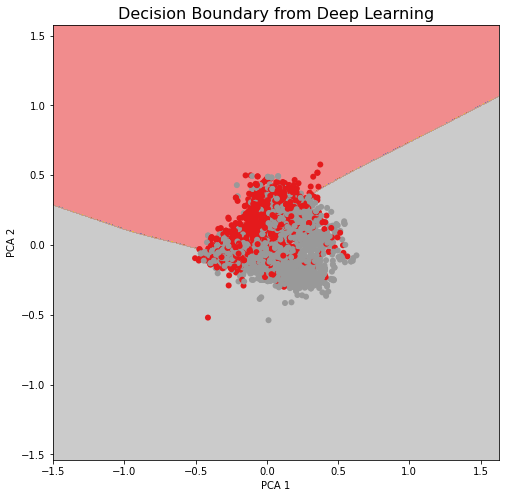

In [29]:
sca.plot_decision_boundary(X, y, model)

This might have taken a while because it creates predictions for all points in the space!

The predictions are not great - also because we mapped them into two dimensions -, but we can clearly see that the boundary is a complex function. 